# B.3. Equity Indexes and ETFs

## FX, Futures, and Equity

### DRW New-Hire Learning Program

#### Summer 2022
 
Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

In [19]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

import seaborn as sns

import sys
sys.path.insert(0, '../cmds')
from utils import *
from portfolio import *

In [2]:
INFILE = f'../data/equity_data.xlsx'
TICK = 'AAPL'
TICKETF = 'SPY'
TICKIDX = 'SPX'

# Equities

## Capital Structure

### Funding

Assets are funded by investors, primarily via one of two types of investor claims:
* debt - senior, fixed (scheduled) claim
* equity - junior, residual claim

This is true of any assets, including
* publicly-listed companies
* privately-listed companies
* private equity funds
* hedge funds

### Stocks

Stocks are equity claims on assets of a corporation.
* Stockholders have a junior claim on the assets and income of the firm.
* Namely, they receive whatever is left over after all other claimants (suppliers, tax collectors, creditors, etc.) have been paid.
* The firm can pay out the residual as dividends or reinvest it in the firm which increases the value of the shares.


### Limited Liability

Limited liability means that shareholders are not accountable for a firm’s obligations.
* Losses are limited to the original investment.
* Equity claim is similar to a call option on a firm’s overall value.
* Compare this to unincorporated businesses where owners are personally liable.

### Market size and ownership

Of all types of capital market securities, stocks have the most market value.
* However, annual new issues are much smaller than that of corporate bonds.
* Annual new issues are less than 1% of the market value of equities.
* About half of stocks are held by individuals. 
* The other half are held by institutional investors such as pension funds, mutual funds, and insurance companies.

## Types of stock
Consider two types of stock.
* **Common stock** is a simple equity claim. It may or may not have voting rights.
* **Preferred stock** is like a hybrid of equity and debt. Like debt, it has no voting rights. 

If no specification is made, “stock” typically refers to common stock, a pure equity claim.

### Preferred stock

Consider some ways preferred is like debt and also equity.
* It has a stated dividend rate, which is similar to a coupon rate on a bond.
* Unlike a bond, the dividend does not have to be paid.
* However, common stockholders cannot be paid dividends until
preferred dividends are paid.
* In fact, usually the cumulative preferred dividend must be paid first.

#### Tax Treatment
Preferred stock has favorable tax treatment, which leads to special demand and supply of it.

### Dual Shares

Some firms have dual share classes, such as an A and B series of shares. Motives include:
- Concentrating control by giving a smaller class much higher voting power
- Ease issues with listing on various exchanges

Examples include Google, Facebook, and Berkshire Hathaway

## Stock Categorization

In trading, it is common to group equities by
- geographical location
- sector
- size 
- style

A few comments on this.

### Cap

The term "cap" typically refers to **equity capitalization** which is the total **market** value of the firm's equity.

Thus, a stock will be bucketed as **small cap, mid cap, large cap**.

### Sector / Industry
There are a number of common sector/industry classifications.

The Global Industry Classification Standard (GICS) is a popular classification, but there are many.

GICS has a top level of 11 Sectors subdivided by Industry Group, Industry and Sub-Industry.

Reference: https://www.msci.com/our-solutions/indexes/gics

## Style

**Style analysis** refers to grouping stocks by various measures.

### Book Metrics

"Book" measures refer to data from financial reporting (accounting).
- These book measures are not the same as actual market values.
- This is especially important to note for the book value of equity, the *book* capitalization.

#### Financial Statements
- balance sheet
- income statment
- statement of cashflows

#### Earnings
For now, all that will be noted about earnings is that they are a book (accounting) measure of profits, **not an actual cashflow.**

Dividends are an actual market cashflow.

### Book-to-Market

The book-to-market (B/M) ratio is the market value of equity divided by the book (balance sheet) value of equity.

High B/M means strong (accounting) fundamentals per market-value-dollar.
- High B/M are value stocks.
- Low B/M are growth stocks.

### Value and Growth
Many other measures of value based on some cash-flow or accounting value per market price.
- Earnings-price is a popular metric beyond value portfolios. Like B/M, the E/P ratio is accounting value per market valuation.
- EBITDA-price is similar, but uses accounting measure of profit that ignores taxes, financing, and depreciation.
- Dividend-price uses common dividends, but less useful for individual firms as many have no dividends.

Many competing claims to special/better measure of ‘value’.

### Other Styles
Group stocks by
- Price movement. Momentum, mean reversion, etc.
- Volatility. Realized return volatility, market beta, etc.
- Profitability.*
- Investment.*

*As measured in financial statements.

# Returns and Trading

## Common Stock Returns

Unlike bonds, common stocks do NOT have a
* maturity
* (relevant) face value

Rather, the notable features determining returns are
* dividends
* price appreciation

## Dividends

In [3]:
dvds = pd.read_excel(INFILE,sheet_name=f'dividends {TICK}').set_index('record_date')
dvds[dvds['dividend_type']=='Regular Cash'].head(8)

,declared_date,ex_date,payable_date,dividend_amount,dividend_frequency,dividend_type
record_date,,,,,,
2022-05-09,2022-04-28,2022-05-06,2022-05-12,0.230,Quarter,Regular Cash
2022-02-07,2022-01-27,2022-02-04,2022-02-10,0.220,Quarter,Regular Cash
2021-11-08,2021-10-28,2021-11-05,2021-11-11,0.220,Quarter,Regular Cash
2021-08-09,2021-07-27,2021-08-06,2021-08-12,0.220,Quarter,Regular Cash
2021-05-10,2021-04-28,2021-05-07,2021-05-13,0.220,Quarter,Regular Cash
2021-02-08,2021-01-27,2021-02-05,2021-02-11,0.205,Quarter,Regular Cash
2020-11-09,2020-10-29,2020-11-06,2020-11-12,0.205,Quarter,Regular Cash
2020-08-10,2020-07-30,2020-08-07,2020-08-13,0.205,Quarter,Regular Cash


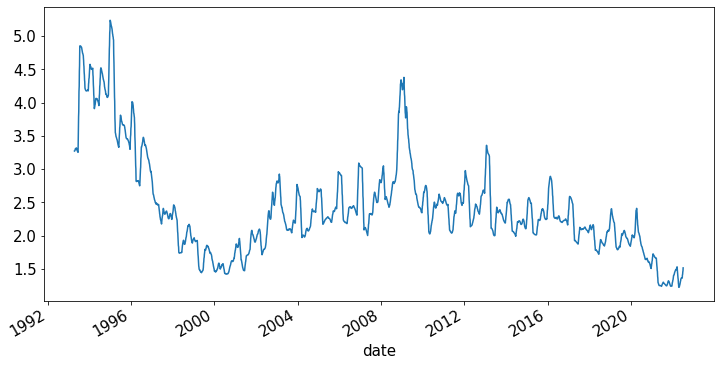

In [4]:
spy = pd.read_excel(INFILE,sheet_name=f'{TICKETF} history').set_index('date')
spy['EQY_DVD_YLD_IND'].rolling(21).mean().plot();

## Corporate Actions

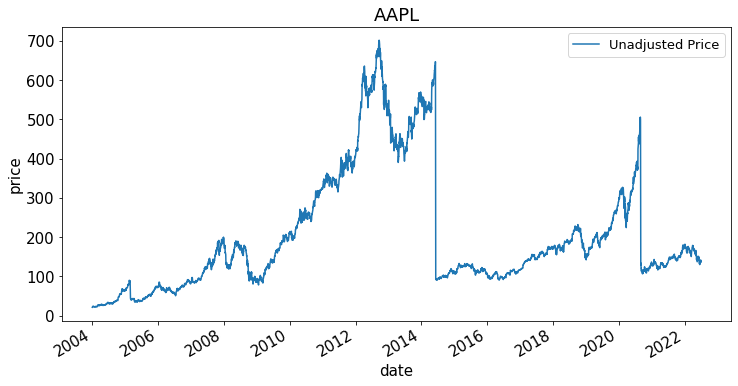

In [5]:
prices = pd.read_excel(INFILE,sheet_name=f'prices {TICK}').set_index('date')

prices['Unadjusted Price'].plot(title=TICK, ylabel='price', legend=['unadjusted price']);

What is going on here? 
- Has Apple really shown so little growth since 2005?
- Has Apple really crashed so hard?

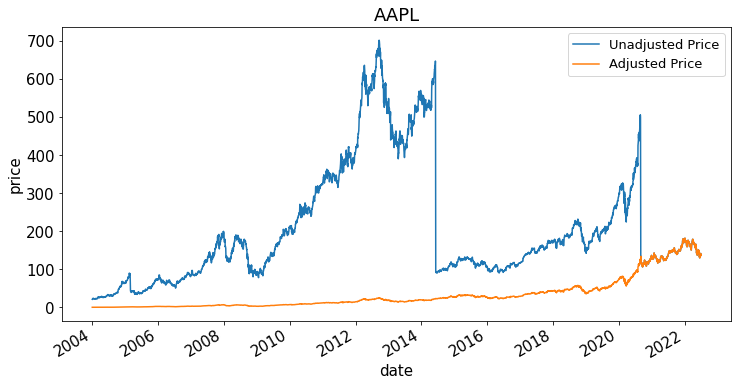

In [6]:
prices[['Unadjusted Price','Adjusted Price']].plot(title=TICK, ylabel='price');

In [7]:
dvds[dvds['dividend_type']=='Stock Split'].rename(columns={'dividend_amount':'split ratio'}).loc[:,['split ratio']]

,split ratio
record_date,
2020-08-24,4.0
2014-06-02,7.0
2005-02-18,2.0
2000-05-19,2.0
1987-05-15,2.0


## Trading Stocks

Issues pertinent to trading, including liquidity and market structure are a focus of Module E. 

Here, these issues are touched briefly.

### Exchanges and Liquidity

Stocks largely trade on **exchanges**.
- contrast this with bonds, which are OTC

Accordingly, stocks are more liquid.
- Firms may have many (even dozens) of bond issues of various sizes and coupons.
- In contrast, they typically have one class of shares

Stock data is easy to get
- Good data on bonds and derivatives often requires subscription to proprietary datasets.
- Reasonably good data (current and historic) for stocks trading on large exchanges is available from many free sources.

### Liquidity and Fees

"Large cap" stocks tend to be quite liquid
- commissions and fees may be on the order of 1% of volume traded
- bid-ask spread depends on the amount
- slippage is the difference between the quoted price and the transacted price. 
- this is especially relevant for the market open, where the quoted price has sat all night

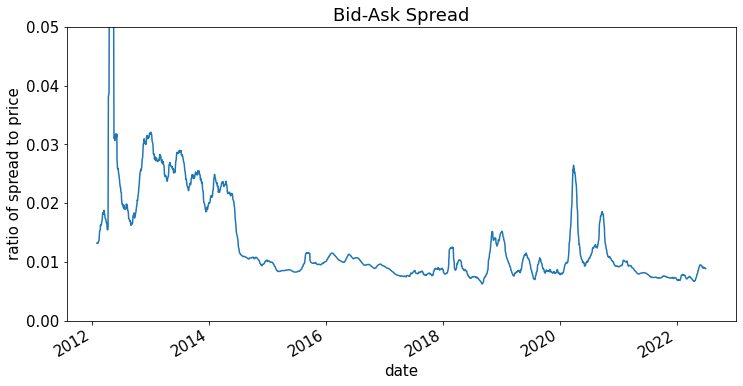

In [8]:
metrics = pd.read_excel(INFILE,sheet_name=f'metrics {TICK}').set_index('date')
metrics.iloc[:,-1].rolling(21).mean().plot(ylim=[0,.05],title='Bid-Ask Spread', ylabel='ratio of spread to price');

### Shorting a Stock

**Shorting** a stock refers to taking a negative position in the stock as follows:
- borrow shares from a broker with the agreement to return them (plus interest) at a fixed time, $T_1$.
- sell the borrowed shares on the open market for $P_0$
- at $T_1$, buy shares on the open market for $P_1$
- use the shares to repay the broker

This leads to a gross profit/loss of $P_0-P_1$.

However, shorting the stock requires **being able to borrow it** from a broker.
- During times of dislocation or high volatility, this can be difficult.
- Holding extended short positions can incur high borrowing costs to undermine the approach.

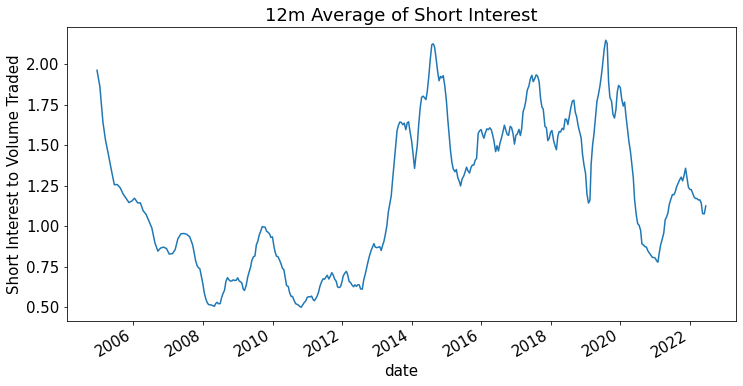

In [9]:
short = pd.read_excel(INFILE,sheet_name=f'short {TICK}').set_index('date')
short['SHORT_INT_RATIO'].rolling(12).mean().plot(title='12m Average of Short Interest',ylabel='Short Interest to Volume Traded');

### International Stocks

American Depository Receipts (ADR’s) are certificates traded in U.S. markets which represent foreign stocks.
* ADR’s are used to make it easier for foreign firms to register securities in the U.S.
* Most foreign stocks traded in U.S. markets use ADRs.
* Sometimes, these are called American Depository Shares, or ADS.

# Indexes

## The S&P 500

### Constituents

The S&P 500 is composed of 
- US-listed public equities
- Large market cap
- Liquid shares
- A few extra conditions on financials to try to eliminate excess turnover

For practical purposes, consider it as the largest 500 U.S. equities.

Reference: S&P Index methodology, pgs 6-10
https://www.spglobal.com/spdji/en/documents/methodologies/methodology-sp-us-indices.pdf?utm_source=pdf_brochure

<img src="../refs/sp500_constituents.png" width=1000 height=500 />

Source: https://finviz.com/map.ashx?t=sec

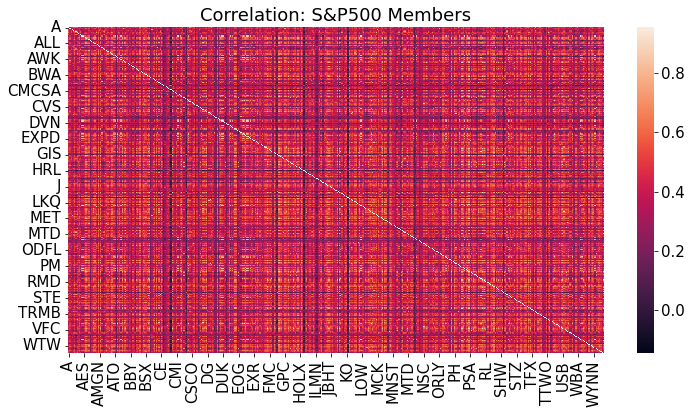

In [10]:
ALTFILE = "../data/spx_returns_weekly.xlsx"
FREQ = 52
rets_spx = pd.read_excel(ALTFILE, sheet_name="s&p500 rets").set_index("date")

sns.heatmap(rets_spx.corr().replace(1,np.nan))
plt.title('Correlation: S&P500 Members')
plt.show()

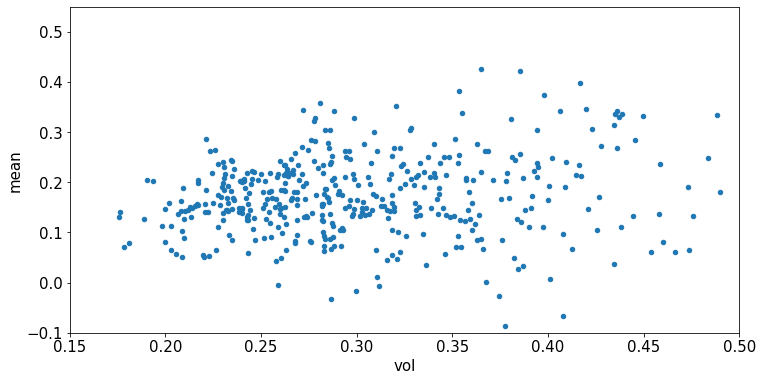

In [11]:
temp = pd.concat([rets_spx.mean()*FREQ, rets_spx.std()*FREQ**.5],axis=1)
temp.columns=['mean','vol']
temp.plot.scatter(x='vol',y='mean',xlim=(.15,.5),ylim=(-.1,.55));

### There is an outlier over this period

The outlier is ENPH 
- joined the S&P 500 at the end of 2020
- energy firm
- volatile and high-trending returns

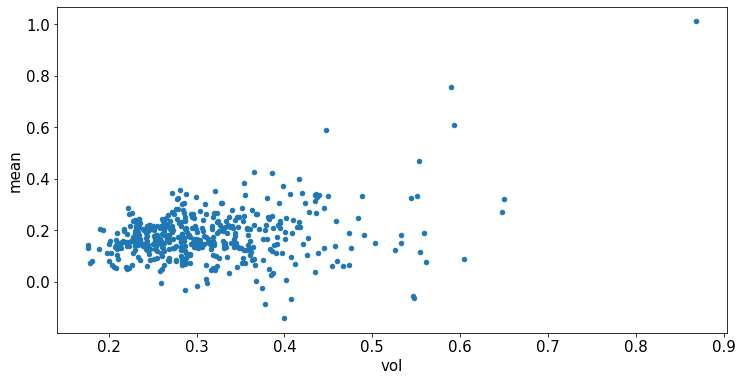

In [12]:
temp.plot.scatter(x='vol',y='mean');

## Additional U.S. Equity Indexes

Other U.S. equity indexes include many from the S&P:
- S&P 100 - mega cap
- S&P 1500 - large and medium cap
- S&P Sector Indexes

Also consider
- Russell 1000
- Russell 2000
- Wilshire 5000

### Dow Jones Industrial
In financial news, you will often see reference to the Dow Jones Industrial Average (DJIA)
- You will rarely (if ever) use this
- Prominent for historical reasons, but not a good choice for most applications/analysis

Problems with using it include
- Index of only 30 "prominent" equities. 
- Weighting is by price, not by market cap. 
- Turnover may be too slow.

**The DJIA is highly correlated to the S&P500, which is probably the only info of use to us in the index.**

## Exchange-based Indexes

An important set of indexes are those that include stocks trading on a particular **exchange**.

* NYSE Composite (New York)
* NASDAQ Composite (New York)
* FTSE 100 (London)
* Nikkei 225 (Tokyo)
* DAX (German)
* Hang Seng (Hong Kong)

### Additional International Equity Indexes

MSCI indexes provide a wide number of indexes based on global regions and other global designations.

## Style Indexes

There are numerous style indexes used as benchmarks for various types of equity trading strategies.

By far, these indexes focus on
* small vs large (size)
* value vs growth (style)

Consider the graphic from Morningstar

<img src="../refs/morningstar_styles.png"/>

Source: https://www.morningstar.com/products/indexes-style

### Fama-French Factors

The Fama-French Factors serve as popular indexes for these styles.
- Particularly for historical research

Source: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [13]:
index_info = pd.read_excel(INFILE,sheet_name='index info').set_index('ticker')
index_info

,name,count_index_members
ticker,,
SPX,S&P 500 INDEX,503
NYA,NYSE COMPOSITE INDEX,1967
CCMP,NASDAQ COMPOSITE,3763
RIY,RUSSELL 1000 INDEX,1020
RTY,RUSSELL 2000 INDEX,1989
INDU,DOW JONES INDUS. AVG,30
DJITR,DJ INDUSTRIAL AVERAGE TR,30
NKY,NIKKEI 225,225
HSI,HANG SENG INDEX,69


In [14]:
cols_international = ['NKY','HSI','UKX','DAX']
cols_forward = ['NKY','HSI']

indexes = pd.read_excel(INFILE,sheet_name=f'index history').set_index('date')
rets_index = indexes.pct_change().dropna()
rets_index = pd.concat([rets_index.drop(columns=cols_international),rets_index[cols_international]],axis=1)
rets_index[cols_forward] = rets_index[cols_forward].shift(-1)

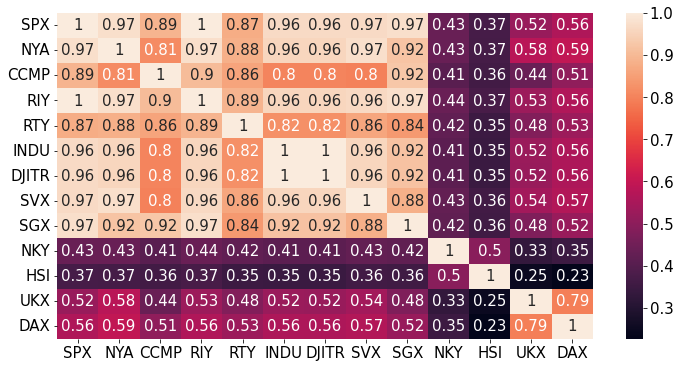

In [15]:
sns.heatmap(rets_index.corr(),annot=True);

# Exchange-Traded Funds

An **exchange-traded-fund**
* Trades on a stock exchange
* Shares of the fund which may hold a variety of assets
* Can be traded intra-day

### Questions
* What is an ETF?
* How does an ETF compare to Mutual Funds? 
* Why trade ETF’s?

### History
ETFs Began trading in the U.S. in 1993.
* Active-ETF’s approved in 2008.
* Around 2,000 ETF’s trade in U.S. markets.

### Variety
ETFs include funds
* passively tracking an index of equities
* actively tracking an equity style or trading strategy (smart beta)
* alternative assets

Most ETF’s track an index. ie. S&P 500, U.S. Treasury rate, BBB-AAA credit spread, etc.
* Target wide variety of equity sectors and geographies.
* Funds for a variety of asset classes: equities, oil, grains, credit instruments, etc.
* Active ETF’s tracking a strategy.

Note that the fund expenses and liquidity vary considerably across ETFs.

Consider a few examples.

In [16]:
etf_info = pd.read_excel(INFILE,sheet_name=f'etf info').set_index('ticker')
etf_info[['fund_expense_ratio','eqy_dvd_yld_ind']] /= 100
etf_info.style.format({'fund_expense_ratio':'{:.2%}','eqy_dvd_yld_ind':'{:.2%}'})

,total_number_of_holdings_in_port,fund_expense_ratio,fund_asset_class_focus,fund_objective_long,eqy_dvd_yld_ind
ticker,,,,,
SPY,507,0.09%,Equity,Large-cap,1.67%
UPRO,521,0.92%,Equity,Large-cap,0.41%
EEM,1270,0.68%,Equity,Emerging Markets,1.85%
VGK,1380,0.08%,Equity,European Region,8.23%
EWJ,242,0.49%,Equity,Japan,2.09%
IYR,90,0.41%,Equity,Real Estate,1.50%
DBC,28,0.88%,Commodity,Broad Based,nan%
HYG,1279,0.48%,Fixed Income,Corporate,5.37%
TIP,51,0.19%,Fixed Income,Inflation Protected,5.90%


## Mutual Funds vs ETFs

ETF’s directly trade unit blocks of the assets, for authorized participants.
* Allows intra-day trading.
* No cash-management for redemption, load, fee, etc.
* No direct redemption means favorable capital-gains treatment.

Liquidity
* Reduce idiosyncratic risk.
* Exchange-traded (U.S.)
* Allow for wide variety of trading strategies.

## Indexes vs ETFs

#### Timing
Above we saw low correlation between equity indexes in the U.S. versus Europe, partly due to asynchronous trading across time-zones.

Below, note that the correlation between SPY, VGK, and EWJ is much higher.

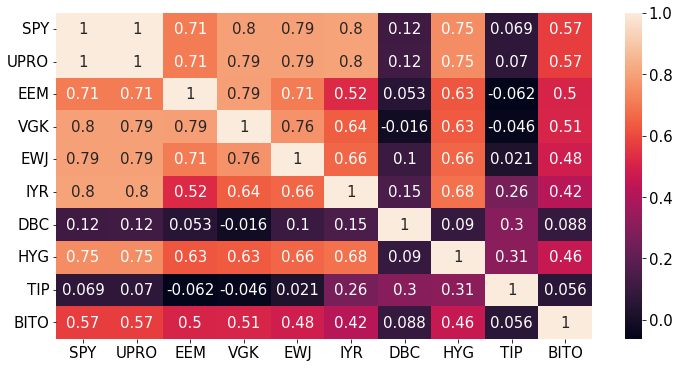

In [17]:
etfs = pd.read_excel(INFILE,sheet_name=f'etf history').set_index('date')
rets_etf = etfs.pct_change().dropna()
sns.heatmap(rets_etf.corr(),annot=True);

### SPX vs SPY?

If we need a benchmark for a strategy, should we use SPX or SPY?

Why do they seem to have different return statistics below?

In [22]:
spy_vs_spx = pd.concat([etfs[['SPY']],indexes[['SPX']]],axis=1).dropna().pct_change()
performanceMetrics(spy_vs_spx,annualization=252).style.format('{:.1%}')

,Mean,Vol,Sharpe,Min,Max
SPY,11.0%,18.9%,58.1%,-10.9%,14.5%
SPX,9.1%,18.6%,48.7%,-12.0%,11.6%


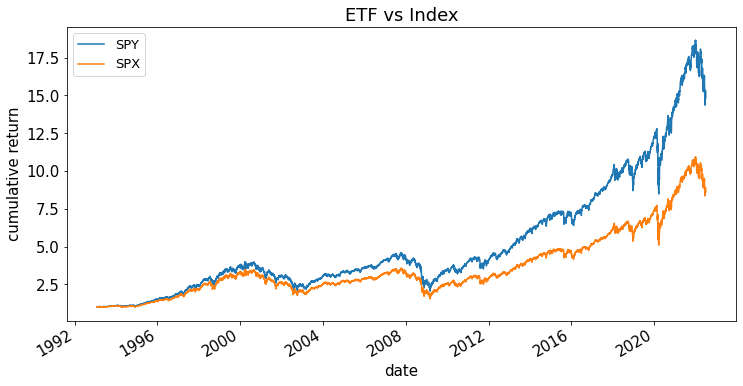

In [24]:
(spy_vs_spx+1).cumprod().plot(title='ETF vs Index',ylabel='cumulative return');

## Levered ETFs

Levered ETFs seek to provide levered exposure to an index, such as the SPX.

These include inverse-levered ETFs.

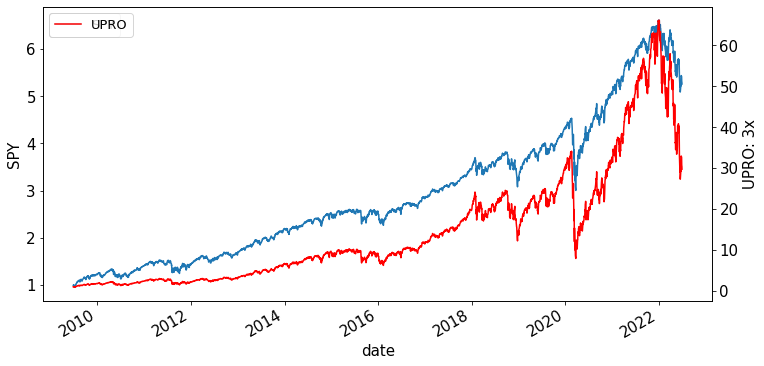

In [43]:
fig, ax = plt.subplots()
spy_vs_letf[['SPY']].plot(ax=ax,ylabel='SPY');
ax2 = plt.twinx(ax=ax)
spy_vs_letf[['UPRO']].plot(ax=ax2,color='r',ylabel='UPRO: 3x');

In [45]:
performanceMetrics(etfs[['SPY','UPRO']].dropna().pct_change(),annualization=252).style.format('{:.1%}')

,Mean,Vol,Sharpe,Min,Max
SPY,14.3%,17.3%,82.4%,-10.9%,9.1%
UPRO,40.0%,52.1%,76.7%,-34.9%,28.0%


### More on LETFs

For more on the subtleties and dangers of Levered ETFs, see the extra notebook.